Student Performance Indicator
Life cycle of Machine learning Project
1)Understanding the Problem Statement
2)Data Collection
3)Data Checks to perform
4)Exploratory data analysis
5)Data Pre-Processing
6)Model Training
7)Choose best model

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("C:/Users/dell/Desktop/mlproject/notebook/data/stud.csv")

In [5]:
df.head(6)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78


In [6]:
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [8]:
df.shape

(1000, 8)

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   str  
 1   race_ethnicity               1000 non-null   str  
 2   parental_level_of_education  1000 non-null   str  
 3   lunch                        1000 non-null   str  
 4   test_preparation_course      1000 non-null   str  
 5   math_score                   1000 non-null   int64
 6   reading_score                1000 non-null   int64
 7   writing_score                1000 non-null   int64
dtypes: int64(3), str(5)
memory usage: 62.6 KB


In [11]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [12]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable:  ",end=" ")
print(df['race_ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental_level_of_education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test_preparation_course'].unique())

Categories in 'gender' variable:      <StringArray>
['female', 'male']
Length: 2, dtype: str
Categories in 'race_ethnicity' variable:   <StringArray>
['group B', 'group C', 'group A', 'group D', 'group E']
Length: 5, dtype: str
Categories in'parental level of education' variable: <StringArray>
[ 'bachelor's degree',       'some college',    'master's degree',
 'associate's degree',        'high school',   'some high school']
Length: 6, dtype: str
Categories in 'lunch' variable:      <StringArray>
['standard', 'free/reduced']
Length: 2, dtype: str
Categories in 'test preparation course' variable:      <StringArray>
['none', 'completed']
Length: 2, dtype: str


In [13]:
numeric_feature=df.select_dtypes(include=np.number).columns.tolist()
categorical_feature=df.select_dtypes(exclude=np.number).columns.tolist()

In [14]:
numeric_feature

['math_score', 'reading_score', 'writing_score']

In [15]:
categorical_feature

['gender',
 'race_ethnicity',
 'parental_level_of_education',
 'lunch',
 'test_preparation_course']

In [16]:
len(numeric_feature)

3

In [17]:
df.head(2)

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


Adding Score for Total Score & Average


In [18]:
df['total_score']=df['math_score']+df["reading_score"]+df["writing_score"]
df["average_score"]=df['total_score']/3 

In [19]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [20]:
reading_full = df[df['reading_score'] == 100].shape[0]
writing_full = df[df['writing_score'] == 100].shape[0]
math_full = df[df['math_score'] == 100].shape[0]

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


In [21]:
reading_less_20 = df[df['reading_score'] <= 20].shape[0]
writing_less_20 = df[df['writing_score'] <= 20].shape[0]
math_less_20 = df[df['math_score'] <= 20].shape[0]

print(f'Number of students with less than 20 marks in Maths: {math_less_20}')
print(f'Number of students with less than 20 marks in Writing: {writing_less_20}')
print(f'Number of students with less than 20 marks in Reading: {reading_less_20}')

Number of students with less than 20 marks in Maths: 4
Number of students with less than 20 marks in Writing: 3
Number of students with less than 20 marks in Reading: 1


4. Exploring Data ( Visualization )
Visualize average score distribution to make some conclusion.
Histogram
Kernel Distribution Function (KDE)
4.1.1 Histogram & KDE

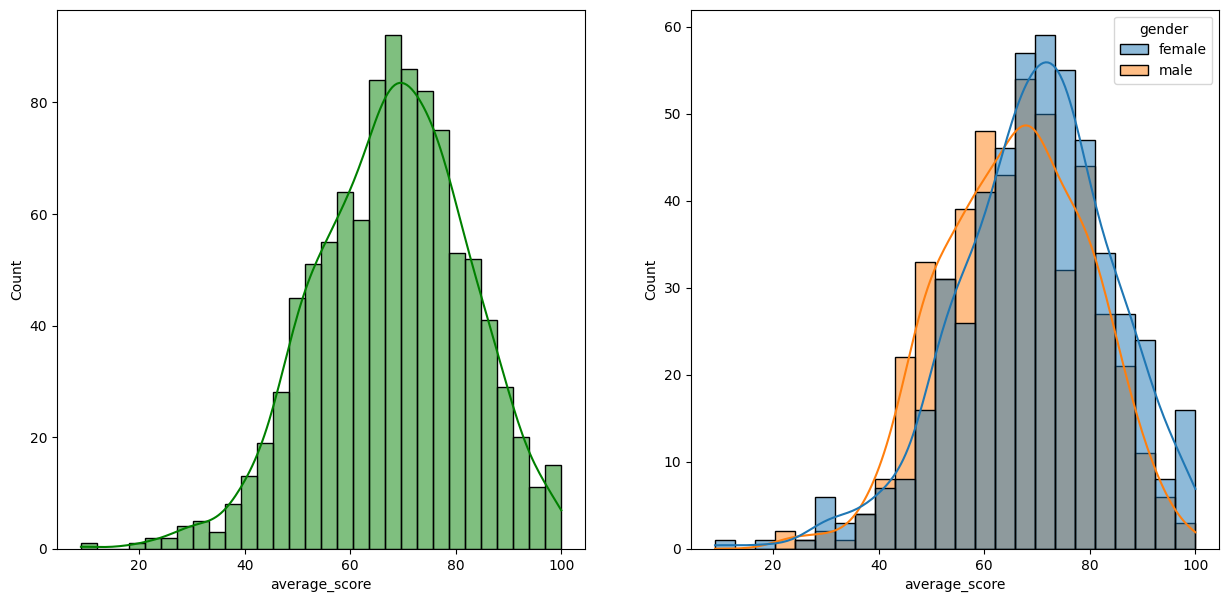

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
sns.histplot(data=df, x='average_score', bins=30, kde=True, color='g', ax=axs[0])
sns.histplot(data=df, x='average_score', kde=True, hue='gender', ax=axs[1])
plt.show()

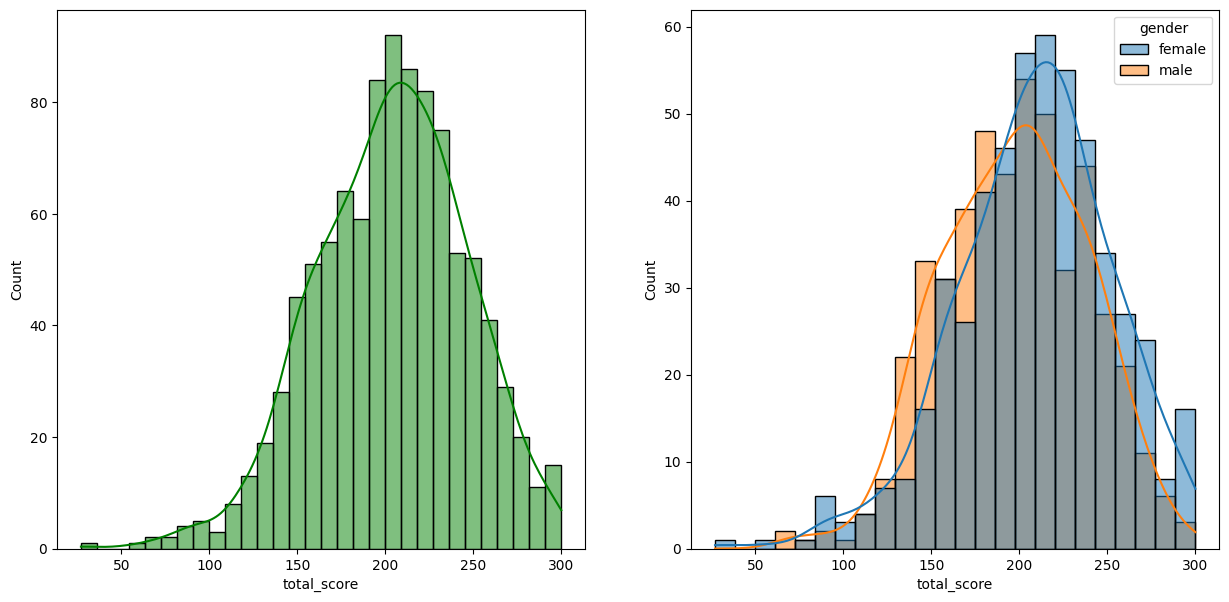

In [22]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='total_score',kde=True,hue='gender')
plt.show()

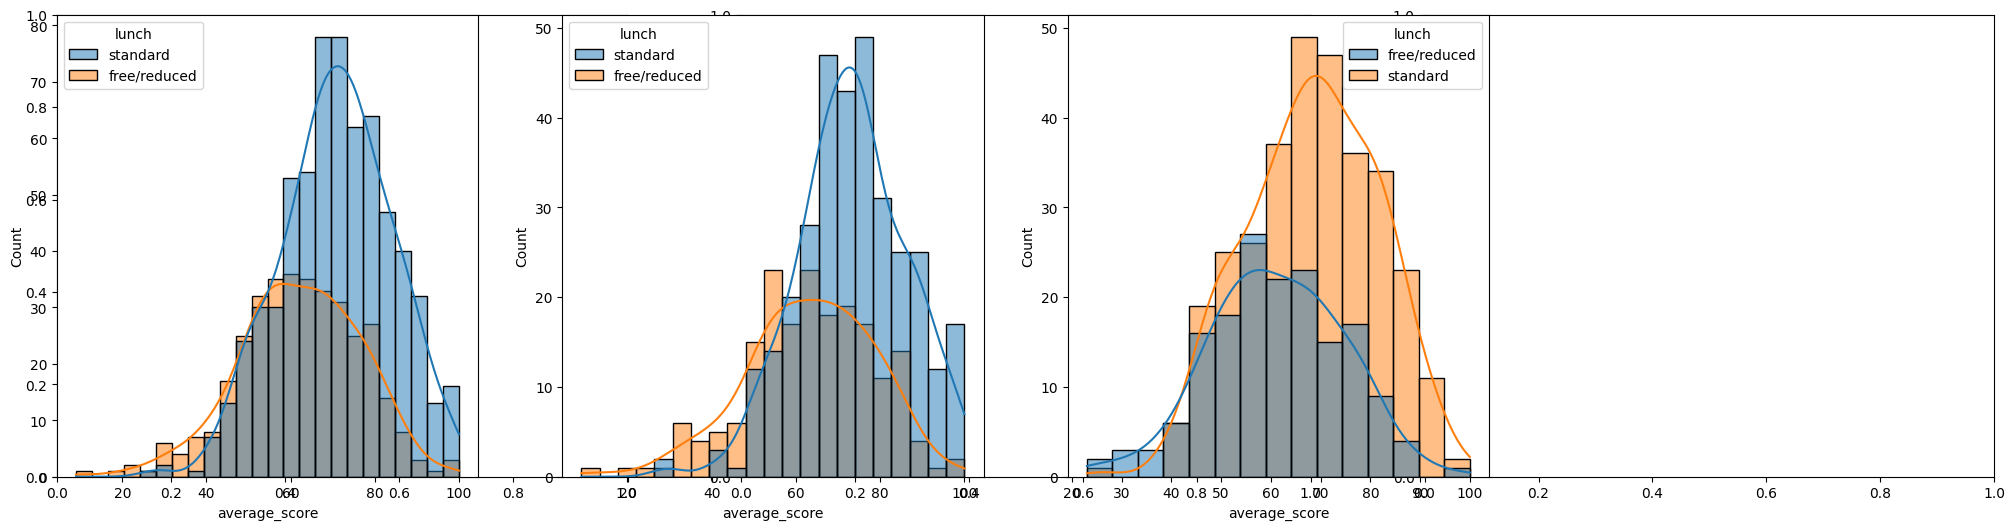

In [24]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df,x='average_score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'],x='average_score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'],x='average_score',kde=True,hue='lunch')
plt.show()

Insights
Standard lunch helps perform well in exams.
Standard lunch helps perform well in exams be it a male or a female.

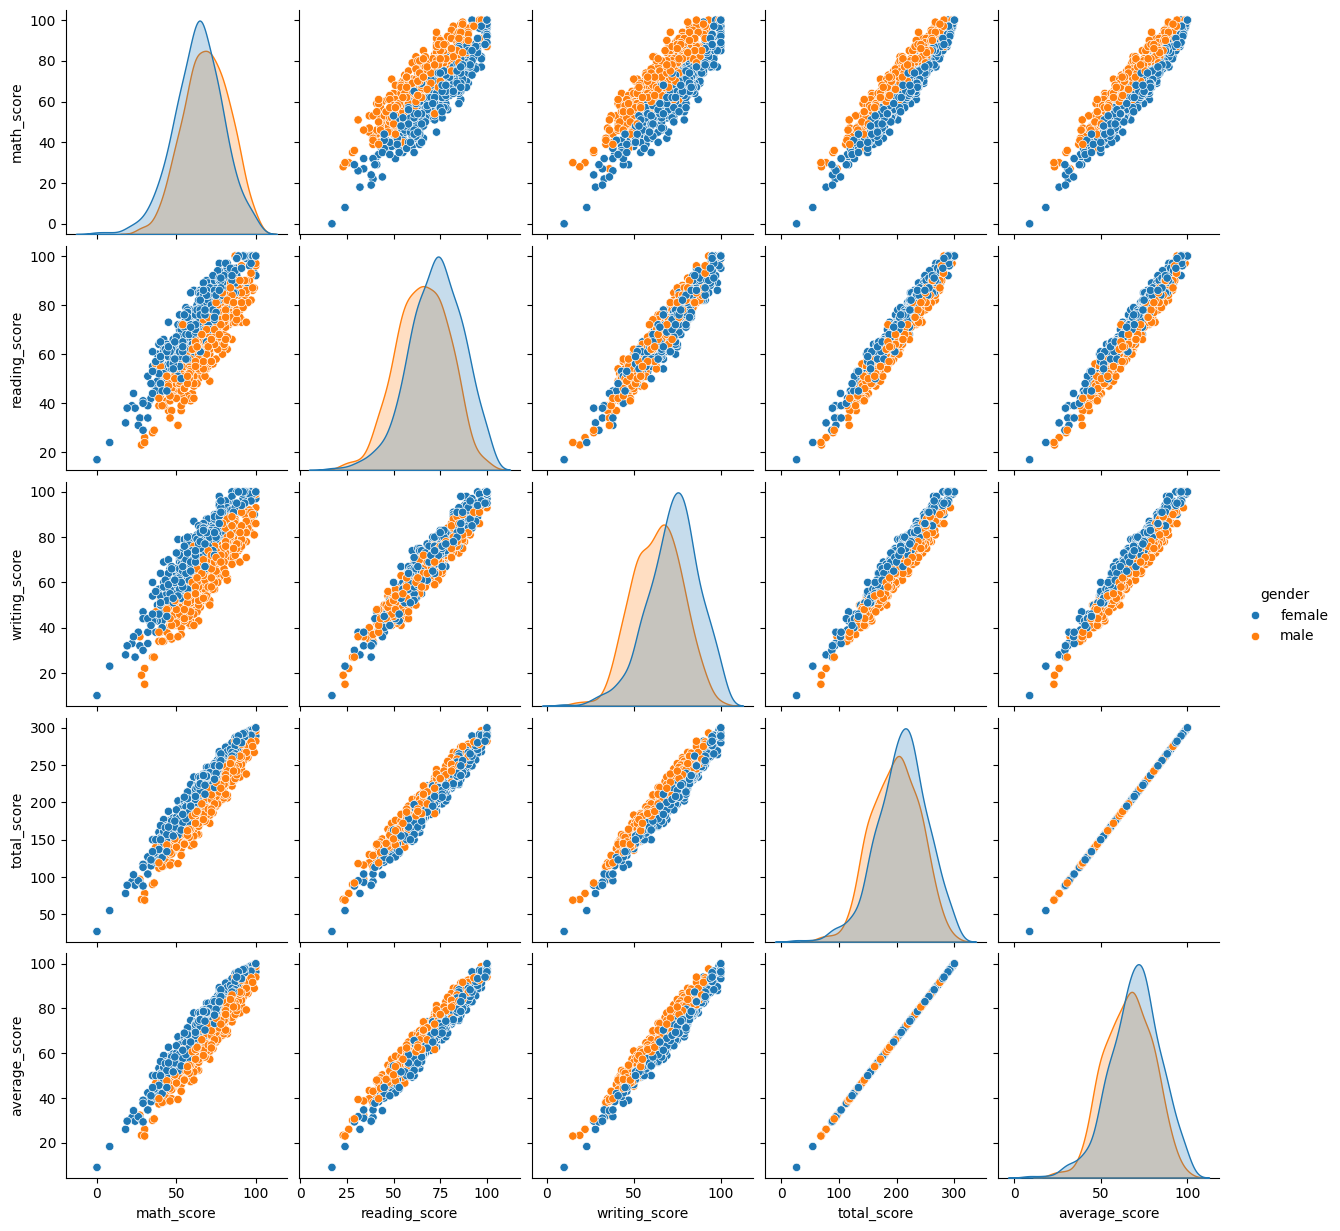

In [25]:
sns.pairplot(df,hue = 'gender')
plt.show()

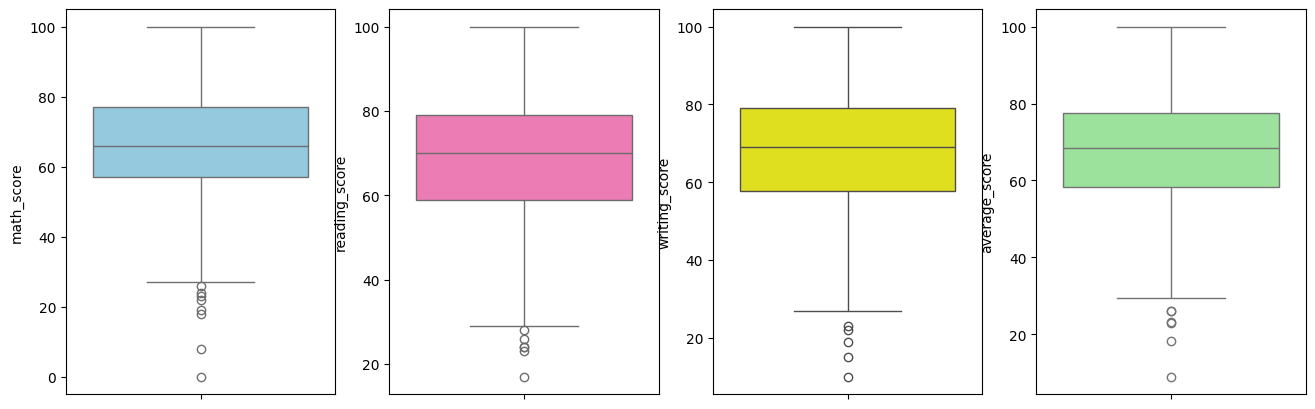

In [26]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average_score'],color='lightgreen')
plt.show()